In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('img.png', 0)
print(img.shape)

(552, 553)


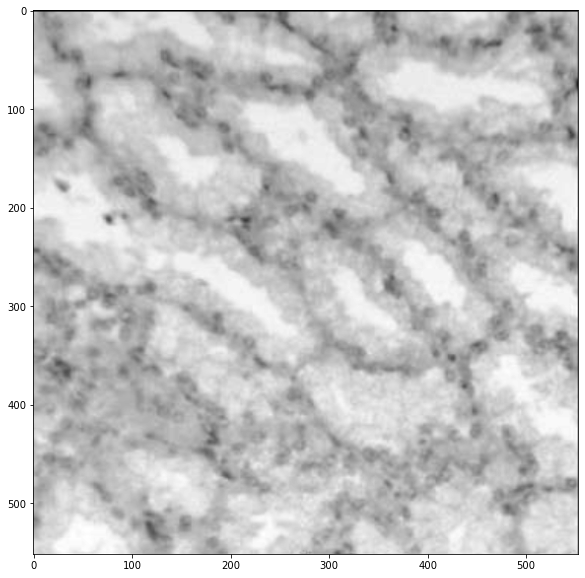

In [3]:
plt.figure(figsize = (10,10))
plt.imshow(img, cmap = 'gray')

In [4]:
img_vec = img.reshape(img.shape[0]*img.shape[1])
img_vec.shape

(305256,)

In [5]:
hist, hist_edges = np.histogram(img_vec, bins=np.arange(256))
print(hist.shape, hist)
print(hist_edges.shape)

(255,) [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  553    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    2    0    2    0    0    0    3
    1    0    3    2    3    3    2    3    3    9   10   12   14   12
   13   28   10   13   10   18   13    9   16   38   38   38   37   52
   58   40   58   59   61   61   58  105   91  111   94  111  132  148
  157  184  224  202  237  266  299  345  399  424  487  505  583  614
  742  797  873  954 1143 1241 1339 1441 1603 1692 1953 2188 2352 2673
 2787 2837 3032 3033 3172 3341 3576 3562 3736 3849 4034 4183 4467 4485
 4593 4931 5091 5170 5297 5140 5316 5306 5494 5466 5584 5977 6455 6679
 6681 6308 6198 6008 5853 5903 5994 5822 5810 5755 5586 5485 5267 5115
 5233 4808 4492 4082 3862 3614 3301 2886 2677 2741 2775 2815 3427 3381
 3375 3335 3060 2451 2654 1432  877  767  390  211  130   28    0    0

<BarContainer object of 255 artists>

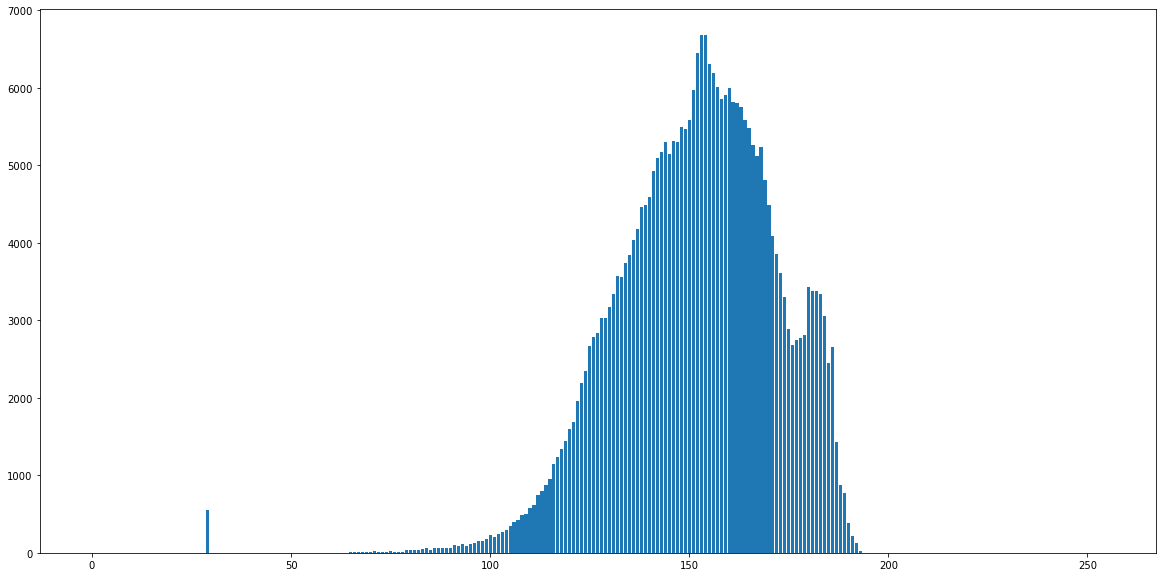

In [6]:
plt.figure(figsize = (20,10))
plt.bar(range(255), hist)

## Image Stretching

Text(0.5, 1.0, 'Contrast Expansion')

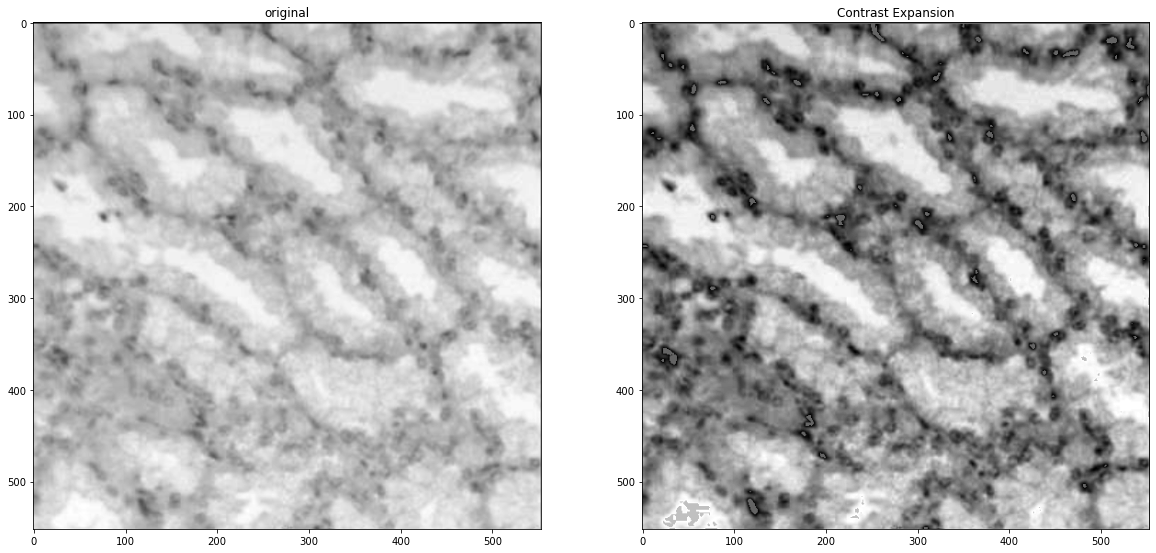

In [26]:
darkest = 100.0
brightest = 190.0

def map_stretch(x):
    if x <= darkest:
        return darkest
    elif x >= brightest:
        return brightest
    else:
        return int(255.0*(x-darkest)/(brightest-darkest))
stretch_fn = np.vectorize(map_stretch)

stretch_img = stretch_fn(img)

fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("original")
axarr[1].imshow(stretch_img, cmap = 'gray')
axarr[1].set_title("Contrast Expansion")

(255,) (256,)


<BarContainer object of 255 artists>

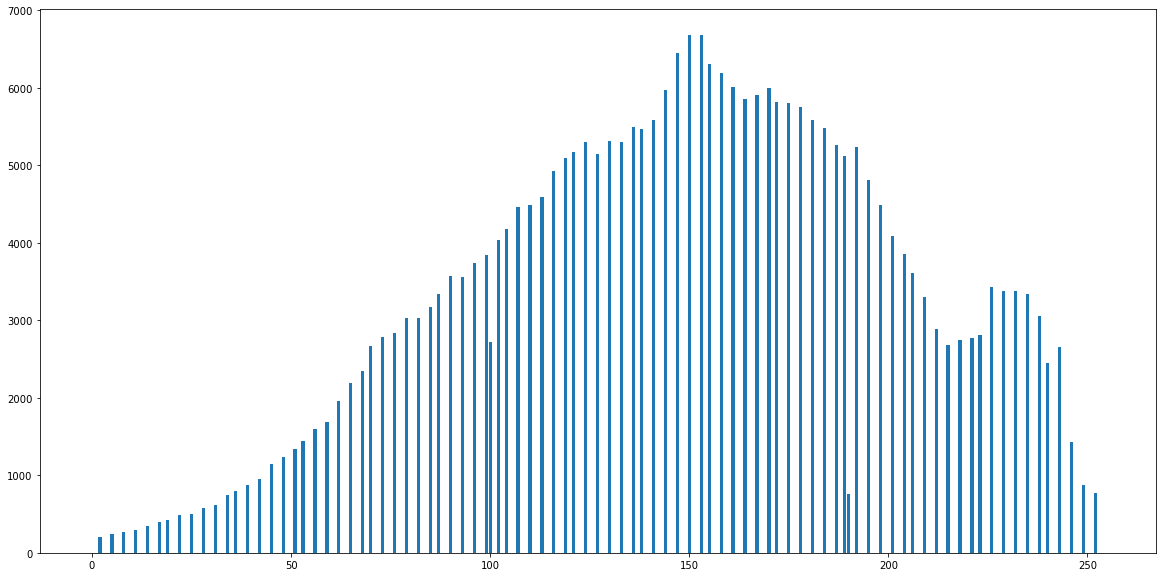

In [8]:
stretch_img_vec = stretch_img.reshape(img.shape[0]*img.shape[1])
st_hist, st_hist_edges = np.histogram(stretch_img_vec, bins=np.arange(256))

print(st_hist.shape, st_hist_edges.shape)

plt.figure(figsize = (20,10))
plt.bar(range(255), st_hist)

In [9]:
print(img)
print(stretch_img)

[[ 29  29  29 ...  29  29  29]
 [ 81  82  81 ...  84  84  73]
 [151 152 151 ... 158 160 132]
 ...
 [171 171 170 ... 165 175 143]
 [172 172 171 ... 167 170 138]
 [171 171 170 ... 166 166 140]]
[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [144. 147. 144. ... 164. 170.  90.]
 ...
 [201. 201. 198. ... 184. 212. 121.]
 [204. 204. 201. ... 189. 198. 107.]
 [201. 201. 198. ... 187. 187. 113.]]


# Histogram Equalization

(0.0, 267.75)

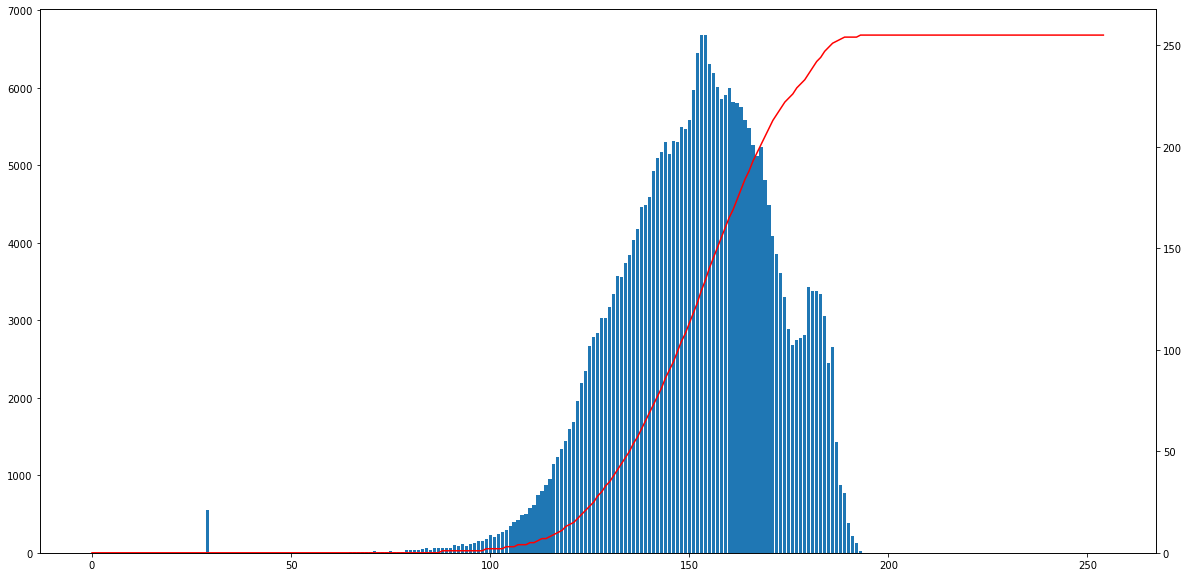

In [10]:
T = img.shape[0]*img.shape[1]
f = []
_cum = 0
for i, hist_i in enumerate(hist):
    _cum += hist_i
    f.append(int(255.0 * float(_cum) / float(T)))

fig, ax1 = plt.subplots(figsize = (20,10))
ax1.bar(range(255), hist)
ax2 = ax1.twinx()
ax2.plot(range(255), f, "r-")
ax2.set_ylim(bottom=0)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [118 123 118 ... 155 165  41]
 ...
 [213 213 209 ... 188 224  81]
 [216 216 213 ... 197 209  61]
 [213 213 209 ... 193 193  69]]


Text(0.5, 1.0, 'Histogram Equalization')

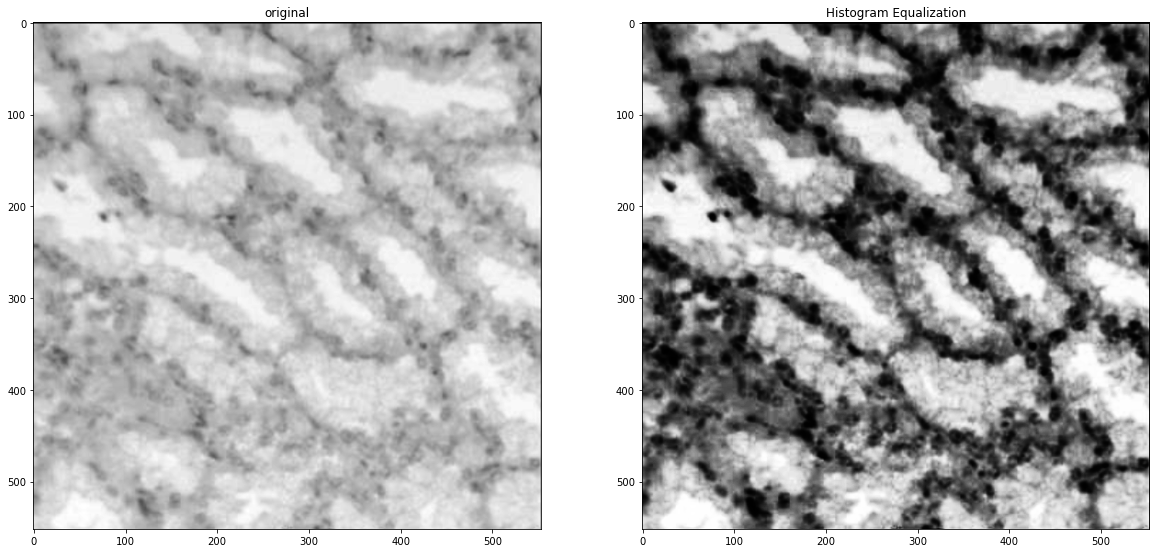

In [11]:
map_histeq = lambda x: f[x]
histeq_fn = np.vectorize(map_histeq)

histeq_img = histeq_fn(img)
print(histeq_img)

fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("original")
axarr[1].imshow(histeq_img, cmap = 'gray')
axarr[1].set_title("Histogram Equalization")

(255,) (256,)


<BarContainer object of 255 artists>

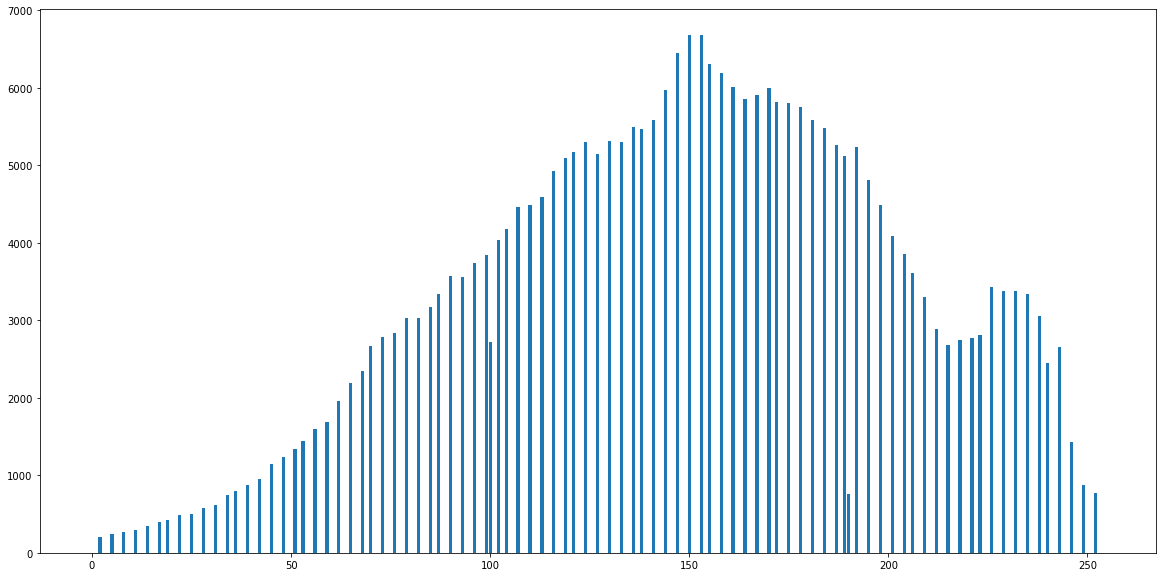

In [12]:
histeq_img_vec = stretch_img.reshape(histeq_img.shape[0]*histeq_img.shape[1])
histeq_hist, histeq_hist_edges = np.histogram(histeq_img_vec, bins=np.arange(256))

print(histeq_hist.shape, histeq_hist_edges.shape)

plt.figure(figsize = (20,10))
plt.bar(range(255), histeq_hist)

## Summary

Text(0.5, 1.0, 'Histogram Equalization')

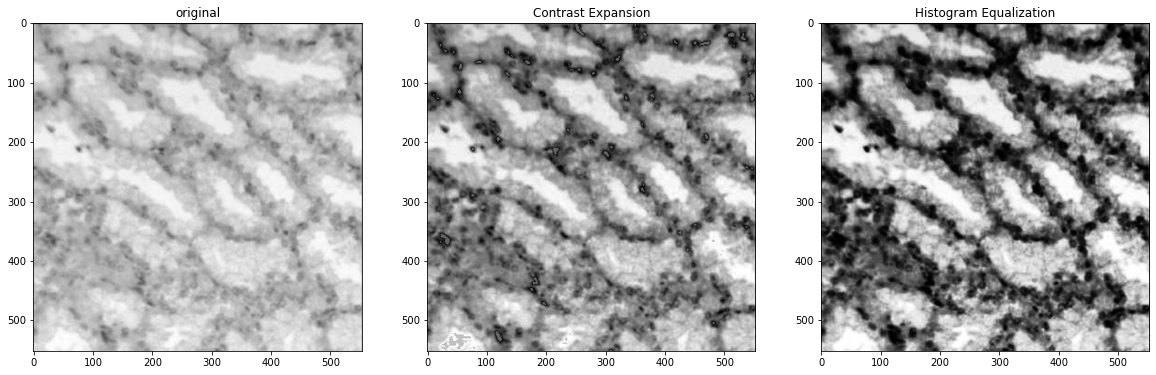

In [27]:
fig, axarr = plt.subplots(1,3, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("original")
axarr[1].imshow(stretch_img, cmap = 'gray')
axarr[1].set_title("Contrast Expansion")
axarr[2].imshow(histeq_img, cmap = 'gray')
axarr[2].set_title("Histogram Equalization")

# Local Equalization

In [14]:
W = 9
HW = math.floor(9/2)

In [15]:
finger_img = cv2.imread('fingerprint.png', 0)
print(finger_img.shape)

(402, 503)


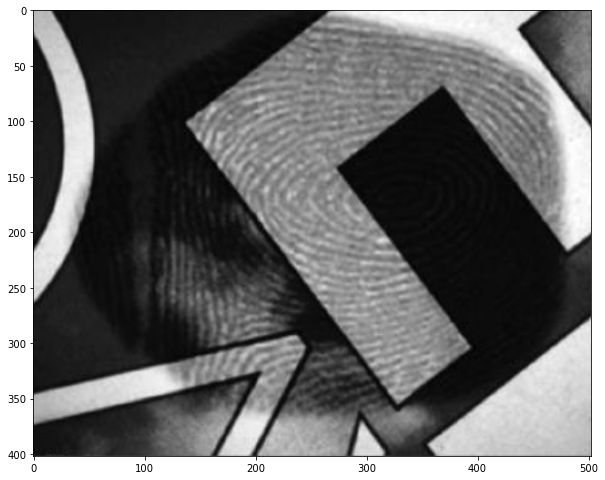

In [16]:
plt.figure(figsize = (10,10))
plt.imshow(finger_img, cmap = 'gray')

In [17]:
def local_equalize(_img: np.array) -> np.array:
    _T = _img.shape[0]*_img.shape[1]
    _img_vec = _img.reshape(_T)
    _hist, _hist_edges = np.histogram(_img_vec, bins=np.arange(256))
    
    _f = []
    _cum = 0
    for i, hist_i in enumerate(_hist):
        _cum += hist_i
        _f.append(int(255.0 * float(_cum) / float(_T)))
    '''
        there is a problem in 255 index
    ''' 
    map_histeq = lambda x: _f[x]
    histeq_fn = np.vectorize(map_histeq)
    histeq_img = histeq_fn(_img)
    return histeq_img

In [18]:
new_img = finger_img.copy()
print(new_img.shape)
for step_i in range(math.floor(finger_img.shape[0]/W)):
    low_i, up_i = step_i*W, (step_i+1)*W 
    for step_j in range(math.floor(finger_img.shape[1]/W)):
        low_j, up_j = step_j*W, (step_j+1)*W
        try:
            local_pad = finger_img[low_i:up_i, low_j:up_j]
            new_img[low_i:up_i, low_j:up_j] = local_equalize(local_pad)
        except IndexError:
            pass

(402, 503)


Text(0.5, 1.0, 'Local equalized')

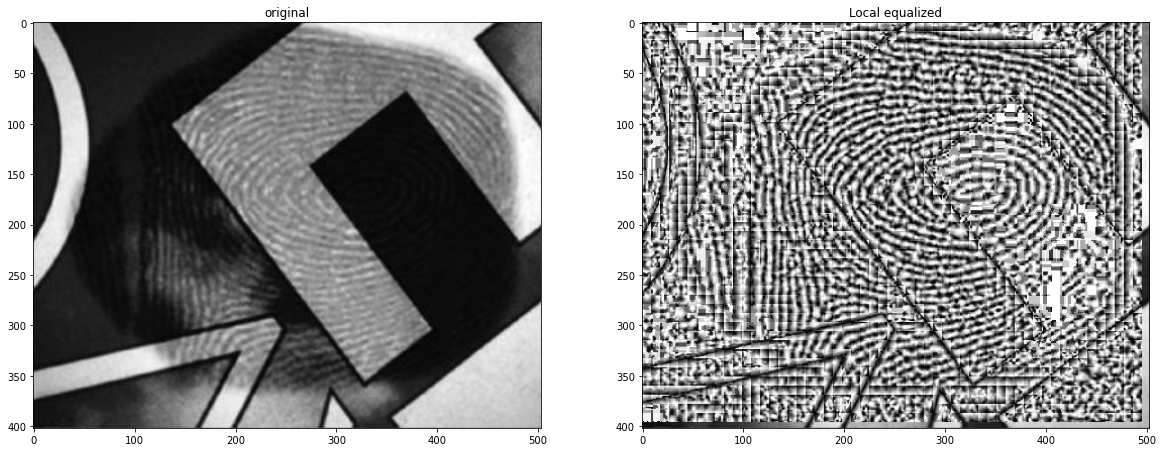

In [25]:
fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(finger_img, cmap = 'gray')
axarr[0].set_title("original")
axarr[1].imshow(new_img, cmap = 'gray')
axarr[1].set_title("Local equalized")